In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings as w
w.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('car_ownership.csv')

In [7]:
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


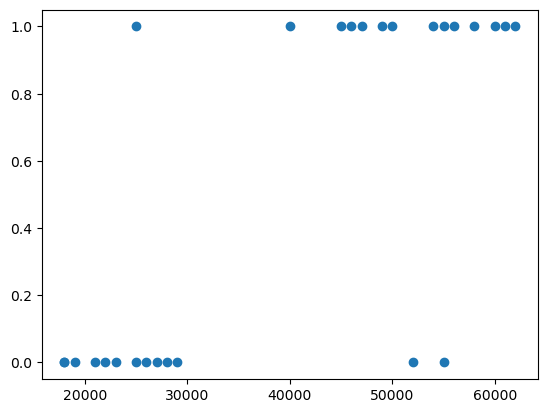

In [8]:
plt.scatter(df.monthly_salary, df.owns_car)

In [9]:
X = df[['monthly_salary']]
y = df['owns_car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8888888888888888

In [11]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [12]:
y_test.tolist()

[1, 0, 1, 0, 0, 0, 1, 1, 0]

In [13]:
model.predict_proba(X_test)

array([[0.04530932, 0.95469068],
       [0.80955349, 0.19044651],
       [0.05158003, 0.94841997],
       [0.86480041, 0.13519959],
       [0.91687254, 0.08312746],
       [0.82967465, 0.17032535],
       [0.87995016, 0.12004984],
       [0.07564619, 0.92435381],
       [0.84806892, 0.15193108]])

In [14]:
model.coef_, model.intercept_

(array([[0.00013621]]), array([-5.39725076]))

In [15]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(salary, model):
    z = model.coef_ * salary + model.intercept_
    y = sigmoid(z[0][0])
    return y

prediction_function(62000, model)

0.954690678813166

In [16]:
prediction_function(29000, model)

0.1904465115158154

In [19]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

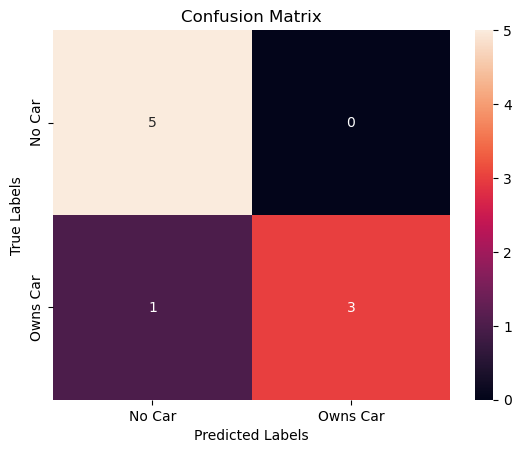

In [24]:
import seaborn as sns

classes = ["No Car", "Owns Car"]

sns.heatmap(cm,annot = True, xticklabels=classes, yticklabels=classes)   
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()